<img src = "img/header.png"><p>

----

<table>
  <tr>
    <th>Nama Mata Kuliah </th>
    <td>Pembelajaran Mesin / Mechine Learning</td>
  </tr>
  <tr>
    <th>Topik</th>
    <td>Kuis 1 | Pertemuan 3 | Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST</td>
  </tr>
  <tr>
    <th>Dosen</th>
    <td>Muhammad Afif Hendawan, S.Kom., M.T. </td>
  </tr>
  <tr>
    <th>Kelompok</th>
    <td>Kelompok 3</td>
  </tr>
  <tr>
    <th>Nama Anggota Kelompok</th>
    <td><p>
    - Alvian Nur Firdaus<p>
    - Devi Andini Febrianti<p>
    - Febrian Dhani Ritonga<p>
    - Naresh Pratista<p>
    - Zahra Annisa Wahono<p></td>
  </tr>
</table>


## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!


-----

### Jawaban


In [1]:
#import library #

# untuk manipulasi data
import pandas as pd

# untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# untuk pre-processing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer

# untuk model SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

c:\Users\TOSHIBA\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### **Soal 1 Memeriksa Data Imbalance**
Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

label  jumlah data
0      6903
1      7877
2      6990
3      7141
4      6824
5      6313
6      6876
7      7293
8      6825
9      6958


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_10324\732428327.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, count in label_counts.iteritems():


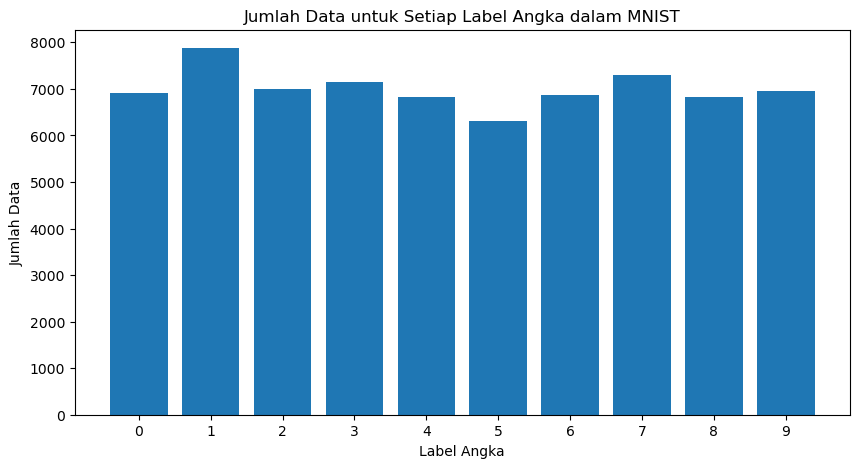

In [3]:
# Ambil target (label) dan ubah ke dalam bentuk DataFrame
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
df['target'] = mnist.target

# Hitung jumlah data setiap label
label_counts = df['target'].value_counts().sort_index()

# Tampilkan hasil perhitungan dengan label dan "jumlah data" dalam format yang diinginkan
print("label  jumlah data")
for label, count in label_counts.iteritems():
    print(f"{label}      {count}")

# Menampilkan visualisasi jumlah data untuk setiap label angka
plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts)
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data')
plt.xticks(range(10))
plt.title('Jumlah Data untuk Setiap Label Angka dalam MNIST')
plt.show()

**Penjelasan**<p>
Berdasarkan jumlah data untuk setiap label dalam dataset MNIST diatas, terlihat bahwa jumlah data untuk setiap label (0 hingga 9) relatif serupa. Tidak ada perbedaan yang signifikan antara jumlah data untuk setiap label, dan semua label memiliki jumlah data yang cukup mendekati satu sama lain.<p>

Dengan demikian, berdasarkan data yang ditampilkan, tidak ada indikasi kuat adanya ketidakseimbangan data pada dataset MNIST yang digunakan. Jumlah data yang serupa untuk setiap label membuatnya lebih seimbang secara keseluruhan, yang merupakan kondisi yang baik untuk melatih model pembelajaran mesin.

<br>

### **Soal 2 Visualisasi Data**
Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

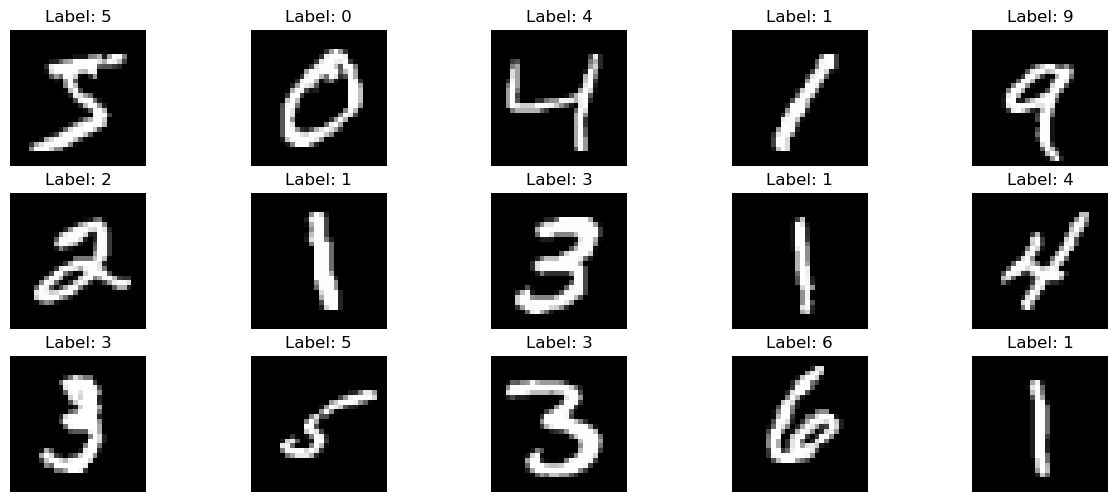

In [4]:
import matplotlib.pyplot as plt

# Mengambil 15 citra pertama dan labelnya
images = mnist.data[:15].to_numpy(dtype=int)
labels = mnist.target[:15]

# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = images.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(15, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.show()

**Penjelasan**<p>

Kode di atas menjelaskan tentang bagaimana menggunakan Matplotlib, matpolip adalah sebuah library dalam bahasa pemrograman Python yang berfungsi untuk menampilkan 15 citra pertama dari dataset MNIST beserta label-labelnya dalam bentuk grid yang terdiri dari 3 baris dan 5 kolom.

### **Soal 4 Split Data**
Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

Lakukan langkah scalling

In [9]:
X = mnist.data.to_numpy(dtype=int)
y = mnist.target

# Standard scaling to normalize pixel values
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

- **Data Training dan Testing dengan Rasio 70:30**

In [10]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Split the data into training (70%) and testing (30%) sets
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

print("Rasio 70:30")
print("Data Training:", X_train_70.shape, y_train_70.shape)
print("Data Testing:", X_test_30.shape, y_test_30.shape)
print("")



Rasio 70:30
Data Training: (49000, 784) (49000,)
Data Testing: (21000, 784) (21000,)



- **Data Training dan Testing dengan Rasio 80:20**

In [11]:
from sklearn.model_selection import train_test_split

X = mnist.data.to_numpy(dtype=int)
y = mnist.target

# Split the data into training (80%) and testing (20%) sets
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print("Rasio 80:20")
print("Data Training:", X_train_80.shape, y_train_80.shape)
print("Data Testing:", X_test_20.shape, y_test_20.shape)
print("")



Rasio 80:20
Data Training: (56000, 784) (56000,)
Data Testing: (14000, 784) (14000,)



- **Data Training dan Testing dengan Rasio 90:10**

In [12]:
from sklearn.model_selection import train_test_split

X = mnist.data.to_numpy(dtype=int)
y = mnist.target

# Split the data into training (90%) and testing (10%) sets
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X_normalized, y, test_size=0.1, random_state=42)

print("Rasio 90:10")
print("Data Training:", X_train_90.shape, y_train_90.shape)
print("Data Testing:", X_test_10.shape, y_test_10.shape)
print("")



Rasio 90:10
Data Training: (63000, 784) (63000,)
Data Testing: (7000, 784) (7000,)



**Penjelasan**<p>
Kemudian kita melakukan normalisasi data citra MNIST menggunakan MinMaxScaler (standart scaling) setelah mengubah data citra menjadi bentuk array NumPy dan menyimpan labelnya di variabel X dan y. Kemudian X_normalized akan berisi data citra yang telah dinormalisasi, yaitu semua nilai piksel akan berada dalam rentang [0, 1]. Data yang telah dinormalisasi ini dapat digunakan sebagai input dalam proses pelatihan model machine learning akan kita gunakan untuk melakukan klasifikasi gambar berdasarkan label-label yang ada dalam variabel y<p>

Setelah Proses normalisasi selesai kami membagi dataset menjadi data training (70% dari data) dan data testing (30% dari data) dengan mempertahankan rasio 70:30, (80% dari data) dan data testing (20% dari data) dengan mempertahankan rasio 80:20, dan (90% dari data) dan data testing (10% dari data) dengan mempertahankan rasio 90:10. kemudian untuk melatih model pada data training dan menguji kinerjanya pada data testing, sehingga memungkinkan evaluasi seberapa baik model  berkinerja pada data yang belum pernah dilihat sebelumnya.



### **Soal 3 Ekstraksi Fitur**
Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [13]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

# No 3
# Initialize and train PCA model
pca = PCA(n_components=150, whiten=True, random_state=42)

# Rasio 70:30
X_train_70_pca = pca.fit_transform(X_train_70)
X_test_30_pca = pca.transform(X_test_30)

# Rasio 80:20
X_train_80_pca = pca.fit_transform(X_train_80)
X_test_20_pca = pca.transform(X_test_20)

# Rasio 90:10
X_train_90_pca = pca.fit_transform(X_train_90)
X_test_10_pca = pca.transform(X_test_10)


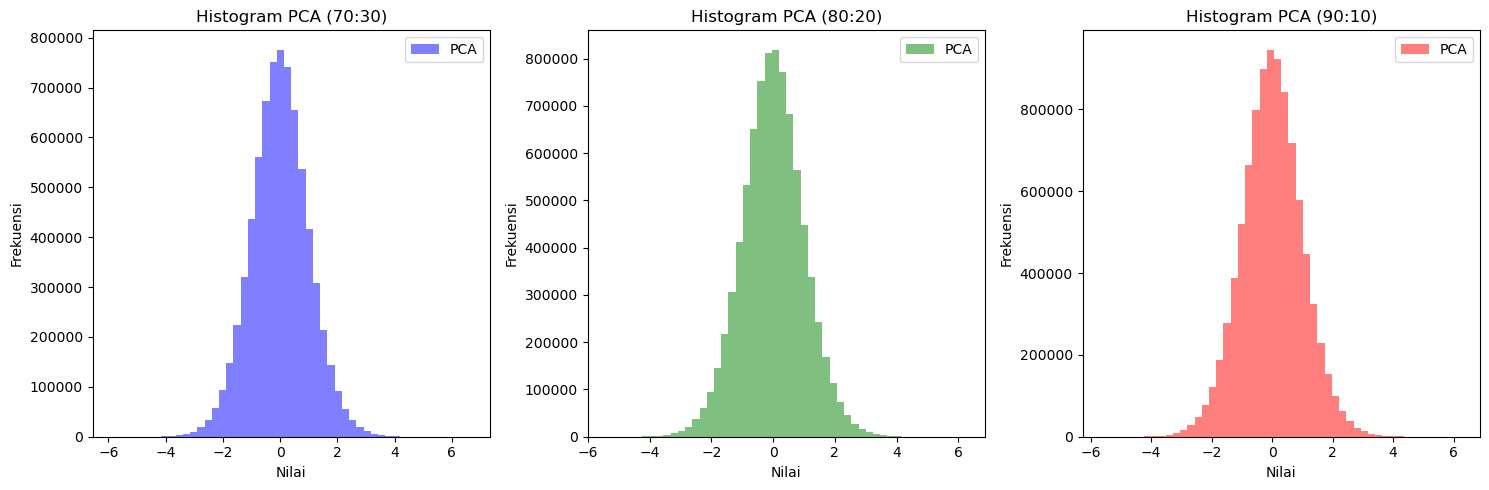

In [14]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


# Extract features (images) and labels
X = mnist.data.to_numpy(dtype=int)
y = mnist.target

# Normalize pixel values to the range [0, 1]
X_normalized = X / 255.0

# Bagi dataset menjadi data training dan data testing untuk tiga rasio yang berbeda
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X_normalized, y, test_size=0.1, random_state=42)

# Initialize and train PCA model with 150 components
pca = PCA(n_components=150, whiten=True, random_state=42)

# Ekstraksi fitur menggunakan PCA
X_train_70_pca = pca.fit_transform(X_train_70)
X_test_30_pca = pca.transform(X_test_30)

X_train_80_pca = pca.fit_transform(X_train_80)
X_test_20_pca = pca.transform(X_test_20)

X_train_90_pca = pca.fit_transform(X_train_90)
X_test_10_pca = pca.transform(X_test_10)

# Visualisasi histogram dari komponen utama (PCA) untuk masing-masing rasio
plt.figure(figsize=(15, 5))

# Rasio 70:30
plt.subplot(1, 3, 1)
plt.hist(X_train_70_pca.ravel(), bins=50, color='b', alpha=0.5, label='PCA')
plt.title('Histogram PCA (70:30)')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()

# Rasio 80:20
plt.subplot(1, 3, 2)
plt.hist(X_train_80_pca.ravel(), bins=50, color='g', alpha=0.5, label='PCA')
plt.title('Histogram PCA (80:20)')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()

# Rasio 90:10
plt.subplot(1, 3, 3)
plt.hist(X_train_90_pca.ravel(), bins=50, color='r', alpha=0.5, label='PCA')
plt.title('Histogram PCA (90:10)')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()

plt.tight_layout()
plt.show()

## **Soal 5 Klasifikasi**

Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.

- Anda diperbolehkan untuk melakukan tunning parameter.
- Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

**Naive Bayes**

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_70_pca, y_train_70)

# Make predictions on the testing data
y_pred_nb_70 = nb_classifier.predict(X_test_30_pca)

In [16]:
from sklearn.model_selection import GridSearchCV

# Initialize Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_80_pca, y_train_80)

# Make predictions on the testing data
y_pred_nb_80 = nb_classifier.predict(X_test_20_pca)

In [17]:
from sklearn.model_selection import GridSearchCV

# Initialize Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_90_pca, y_train_90)

# Make predictions on the testing data
y_pred_nb_90 = nb_classifier.predict(X_test_10_pca)

**SVM**

In [18]:
from sklearn.svm import SVC


# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can try different kernels (e.g., 'linear', 'rbf', 'poly', etc.)

# Train the SVM model on the training data
svm_classifier.fit(X_train_70_pca, y_train_70)

# Make predictions on the testing data
y_pred_svm_70 = svm_classifier.predict(X_test_30_pca)



In [19]:
from sklearn.svm import SVC


# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can try different kernels (e.g., 'linear', 'rbf', 'poly', etc.)

# Train the SVM model on the training data
svm_classifier.fit(X_train_80, y_train_80)

# Make predictions on the testing data
y_pred_svm_80 = svm_classifier.predict(X_test_20)


In [20]:
from sklearn.svm import SVC


# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can try different kernels (e.g., 'linear', 'rbf', 'poly', etc.)

# Train the SVM model on the training data
svm_classifier.fit(X_train_90, y_train_90)

# Make predictions on the testing data
y_pred_svm_90 = svm_classifier.predict(X_test_10)


## **Soal 6 Evaluasi Model**

Evaluasi model yang Anda buat terhadap data training dan data testing.

- Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
- Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
- Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

**Ratio 70:30**

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test_30, y_pred_nb_70)
print(f"Accuracy (Naive Bayes): {accuracy_nb:.2f}")
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test_30, y_pred_svm_70)
print(f"Accuracy (SVM): {accuracy_svm:.2f}")

# Classification Report
print("Classification Report (Naive Bayes):\n", classification_report(y_test_30, y_pred_nb_70))
# Classification Report
print("Classification Report (SVM):\n", classification_report(y_test_30, y_pred_svm_70))

# Confusion Matrix
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test_30, y_pred_nb_70))
# Confusion Matrix
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test_30, y_pred_svm_70))

Accuracy (Naive Bayes): 0.85
Accuracy (SVM): 0.97
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2058
           1       0.98      0.94      0.96      2364
           2       0.68      0.86      0.76      2133
           3       0.82      0.82      0.82      2176
           4       0.88      0.82      0.85      1936
           5       0.79      0.81      0.80      1915
           6       0.94      0.88      0.91      2088
           7       0.92      0.83      0.87      2248
           8       0.85      0.83      0.84      1992
           9       0.80      0.82      0.81      2090

    accuracy                           0.85     21000
   macro avg       0.86      0.85      0.86     21000
weighted avg       0.86      0.85      0.86     21000

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2058
           1  

**Ratio 80:20**

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test_20, y_pred_nb_80)
print(f"Accuracy (Naive Bayes): {accuracy_nb:.2f}")
# Evaluate the SVM model
accuracy_svm= accuracy_score(y_test_20, y_pred_svm_80)
print(f"Accuracy (SVM): {accuracy_svm:.2f}")

# Classification Report
print("Classification Report (Naive Bayes):\n", classification_report(y_test_20, y_pred_nb_80))
# Classification Report
print("Classification Report (SVM):\n", classification_report(y_test_20, y_pred_svm_80))

# Confusion Matrix
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test_20, y_pred_nb_80))
# Confusion Matrix
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test_20, y_pred_svm_80))


Accuracy (Naive Bayes): 0.86
Accuracy (SVM): 0.98
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1343
           1       0.98      0.93      0.96      1600
           2       0.67      0.86      0.75      1380
           3       0.83      0.83      0.83      1433
           4       0.87      0.81      0.84      1295
           5       0.79      0.82      0.80      1273
           6       0.94      0.89      0.91      1396
           7       0.91      0.83      0.87      1503
           8       0.86      0.84      0.85      1357
           9       0.80      0.82      0.81      1420

    accuracy                           0.86     14000
   macro avg       0.86      0.85      0.86     14000
weighted avg       0.86      0.86      0.86     14000

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1  

**Ratio 90:10**

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test_10, y_pred_nb_90)
print(f"Accuracy (Naive Bayes): {accuracy_nb:.2f}")
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test_10, y_pred_svm_90)
print(f"Accuracy (SVM): {accuracy_svm:.2f}")

# Classification Report
print("Classification Report (Naive Bayes):\n", classification_report(y_test_10, y_pred_nb_90))
# Classification Report
print("Classification Report (SVM):\n", classification_report(y_test_10, y_pred_svm_90))

# Confusion Matrix
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test_10, y_pred_nb_90))
# Confusion Matrix
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test_10, y_pred_svm_90))

Accuracy (Naive Bayes): 0.85
Accuracy (SVM): 0.97
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       683
           1       0.98      0.93      0.96       800
           2       0.66      0.86      0.75       674
           3       0.82      0.82      0.82       760
           4       0.87      0.79      0.83       611
           5       0.77      0.80      0.79       658
           6       0.94      0.90      0.92       677
           7       0.93      0.83      0.88       724
           8       0.87      0.85      0.86       693
           9       0.82      0.83      0.82       720

    accuracy                           0.85      7000
   macro avg       0.86      0.85      0.86      7000
weighted avg       0.86      0.85      0.86      7000

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       683
           1  

## **Soal 7 Hasil Pelabelan**
Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

**Naive Bayes**

- Ratio 70:30

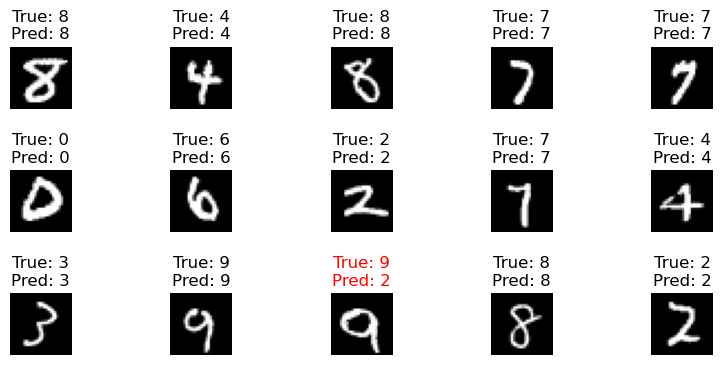

In [25]:

# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_30.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_30.iloc[i] if isinstance(y_test_30, pd.Series) else y_test_30[i]
    pred_label = y_pred_nb_70.iloc[i] if isinstance(y_pred_nb_70, pd.Series) else y_pred_nb_70[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

**Ratio 80:20** 

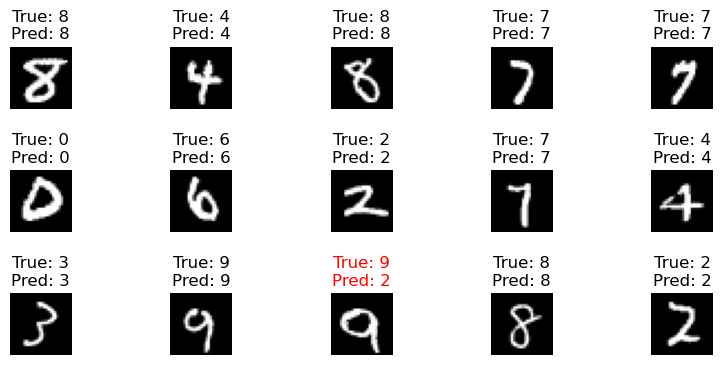

In [26]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_20.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_20.iloc[i] if isinstance(y_test_20, pd.Series) else y_test_20[i]
    pred_label = y_pred_nb_80.iloc[i] if isinstance(y_pred_nb_80, pd.Series) else y_pred_nb_80[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

**Ratio 90:10**

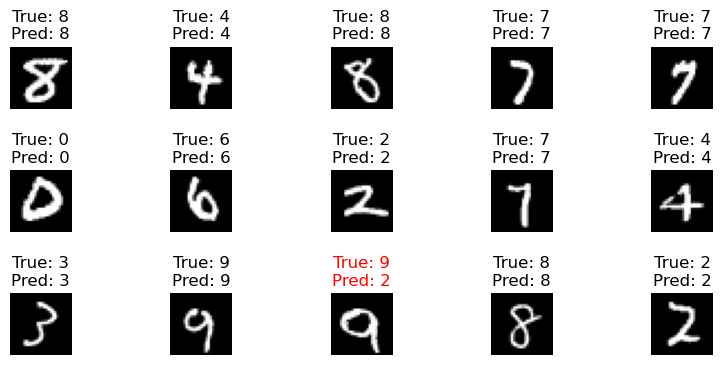

In [27]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_10.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_10.iloc[i] if isinstance(y_test_10, pd.Series) else y_test_10[i]
    pred_label = y_pred_nb_90.iloc[i] if isinstance(y_pred_nb_90, pd.Series) else y_pred_nb_90[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

**SVM**

- **Ratio 70:30**

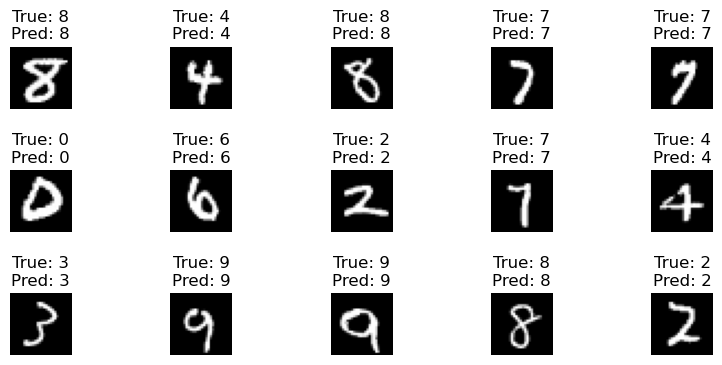

In [28]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_30.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_30.iloc[i] if isinstance(y_test_30, pd.Series) else y_test_30[i]
    pred_label = y_pred_svm_70.iloc[i] if isinstance(y_pred_svm_70, pd.Series) else y_pred_svm_70[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

**Ratio 80:20** 

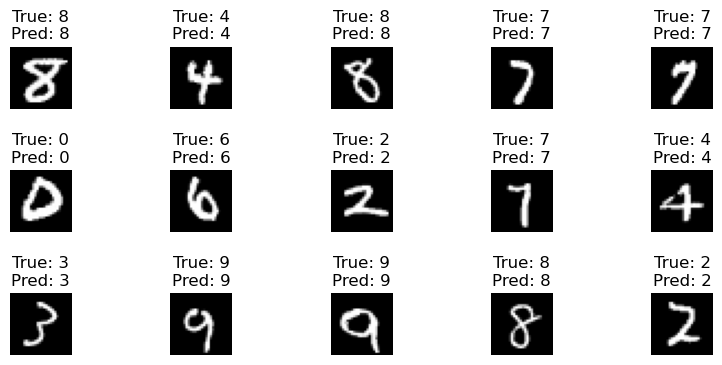

In [29]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_20.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_20.iloc[i] if isinstance(y_test_20, pd.Series) else y_test_20[i]
    pred_label = y_pred_svm_80.iloc[i] if isinstance(y_pred_svm_80, pd.Series) else y_pred_svm_80[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

**Ratio 90:10**

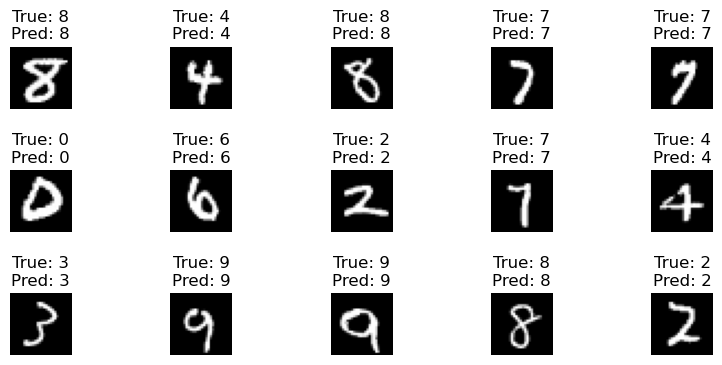

In [30]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_10.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_10.iloc[i] if isinstance(y_test_10, pd.Series) else y_test_10[i]
    pred_label = y_pred_svm_90.iloc[i] if isinstance(y_pred_svm_90, pd.Series) else y_pred_svm_90[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

## **Soal 8 Model Terbaik**


Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

**Jawab**<p>

<table>
  <tr>
    <th>Pemilihan Model </th>
    <td>Model terbaik yang kami temukan adalah Support Vector Machine (SVM).</td>
  </tr>
  <tr>
    <th>Konfigurasi Model</th>
    <td>Kami menggunakan kernel RBF (Radial Basis Function) untuk SVM dan mengatur seed (random_state) ke 42.</td>
  </tr>
  <tr>
    <th>Tingkat Akurasi</th>
    <td>Kami telah mencoba dan mencapai tingkat akurasi sebesar 98% saat menggunakan rasio data pelatihan dan pengujian 80:20. Ini berarti model Kita dapat memprediksi dengan benar 98% dari data pengujian.</td>
  </tr>
  <tr>
    <th>Penjelasan Performa Model</th>
  </tr>
  <tr>
    <th>Waktu Komputasi</th>
    <td> Model SVM ini mencapai performa yang baik dengan waktu komputasi kurang dari 10 menit. maka menunjukkan bahwa model SVM efisien dalam melatih dan memprediksi data.</td>
  </tr>
   <tr>
    <th>Classification Report</th>
    <td>Classification report memberikan informasi tentang metrik performa untuk setiap kelas (0-9) dan juga metrik agregat. Dalam hal ini, kita dapat melihat bahwa model memiliki presisi, recall, dan F1-score yang tinggi untuk setiap kelas, yang menunjukkan bahwa model dapat mengidentifikasi dan memprediksi semua kelas dengan baik.</td>
  </tr>
  <tr>
    <th>Confusion Matrix</th>
    <td> Confusion matrix adalah tabel yang menggambarkan hasil prediksi model dibandingkan dengan label yang sebenarnya. Dalam matriks kebingungan ini, kita dapat melihat bahwa mayoritas elemen diagonal utama memiliki nilai yang tinggi, yang berarti model dengan benar memprediksi kelas-kelas tersebut. Elemen-elemen di luar diagonal utama juga memiliki nilai yang relatif kecil, menunjukkan bahwa model memiliki sedikit kesalahan dalam memprediksi kelas-kelas tersebut.</td>
  </tr>
</table>

Dengan tingkat akurasi yang tinggi, performa yang baik dalam metrik presisi, recall, dan F1-score, serta waktu komputasi yang cepat, model SVM ini bagi kelompok 3 sangat baik untuk tugas klasifikasi digit yang Kami lakukan. Model ini berhasil mengklasifikasikan digit-digit dengan akurasi yang cukuptinggi.